#Problemas de clasificación

Diego Rosas A01634154

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest, f_classif, SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict

#Problema 1

In [4]:
# Load data set. Trabajé con el dataset P1_3 debido a que mi matrícula A01634154 termina en 4
data = np.loadtxt("P1_3.txt")
x = data[:,2:]
y = data[:,0]

In [5]:
# Calcular la cantidad de muestras de cada clase
cantidad_clase_1 = np.sum(y == 1)
cantidad_clase_2 = np.sum(y == 2)

# Imprimir la cantidad de muestras de cada clase
print(f'Cantidad de muestras de clase 1: {cantidad_clase_1}')
print(f'Cantidad de muestras de clase 2: {cantidad_clase_2}')

Cantidad de muestras de clase 1: 298
Cantidad de muestras de clase 2: 1496


#1. Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.

In [6]:
##### Accuracy with imbalanced sample #####

print("----- Imbalanced sample -----")
x = data[:,2:]
y = data[:,0]

kf = StratifiedKFold(n_splits=5, shuffle = True)
clf = SVC(kernel = 'linear')

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]
    clf.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

##### Accuracy with balanced sample (Subsamplig) #####

print("----- Subsamplig -----")

clf = SVC(kernel = 'linear')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    x1 = x_train[y_train==1, :]
    y1 = y_train[y_train==1]
    n1 = len(y1)

    x2 = x_train[y_train==2, :]
    y2 = y_train[y_train==2]
    n2 = len(y2)

    ind = random.sample([i for i in range(n2)], n1)

    x_sub = np.concatenate((x1, x2[ind,:]), axis=0)
    y_sub = np.concatenate((y1, y2[ind]), axis=0)

    clf.fit(x_sub, y_sub)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

##### Accuracy with balanced sample (Upsampling) #####
print("----- Upsampling -----")

clf = SVC(kernel = 'linear')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    x1 = x_train[y_train==1, :]
    y1 = y_train[y_train==1]
    n1 = len(y1)

    x2 = x_train[y_train==2, :]
    y2 = y_train[y_train==2]
    n2 = len(y2)

    ind = random.choices([i for i in range(n1)], k = n2)

    x_sub = np.concatenate((x1[ind,:], x2), axis=0)
    y_sub = np.concatenate((y1[ind], y2), axis=0)

    clf.fit(x_sub, y_sub)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

##### Accuracy with balanced sample (weighted loss function) #####

print("----- Weighted loss function -----")
x = data[:,2:]
y = data[:,0]

clf = SVC(kernel = 'linear', class_weight='balanced')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]
    clf.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Imbalanced sample -----
              precision    recall  f1-score   support

         1.0       0.74      0.66      0.70       298
         2.0       0.93      0.95      0.94      1496

    accuracy                           0.91      1794
   macro avg       0.84      0.81      0.82      1794
weighted avg       0.90      0.91      0.90      1794

----- Subsamplig -----
              precision    recall  f1-score   support

         1.0       0.48      0.85      0.61       298
         2.0       0.96      0.81      0.88      1496

    accuracy                           0.82      1794
   macro avg       0.72      0.83      0.75      1794
weighted avg       0.88      0.82      0.84      1794

----- Upsampling -----
              precision    recall  f1-score   support

         1.0       0.56      0.82      0.66       298
         2.0       0.96      0.87      0.91      1496

    accuracy                           0.86      1794
   macro avg       0.76      0.84      0.79      179

Debido a que buscamos maximizar la precisión del modelo cuando se trata de la clase minoritaria (clase 1), tomando en cuenta los resultados de recall podemos concluir que el mejor balanceo es submuestreo o subsampling.

#2. Linear SVM. Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

In [7]:
features = x
n_features = len(x)

# Linear SVM
print('----- Linear-SVM -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = SVC(kernel = 'linear')
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Linear-SVM -----
              precision    recall  f1-score   support

         1.0       0.76      0.69      0.72       298
         2.0       0.94      0.96      0.95      1496

    accuracy                           0.91      1794
   macro avg       0.85      0.82      0.84      1794
weighted avg       0.91      0.91      0.91      1794



#2. RBF SVM. Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

In [8]:
# RBF SVM
print('----- RBF-SVM -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = SVC(kernel = 'rbf')
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- RBF-SVM -----
              precision    recall  f1-score   support

         1.0       0.85      0.61      0.71       298
         2.0       0.93      0.98      0.95      1496

    accuracy                           0.92      1794
   macro avg       0.89      0.79      0.83      1794
weighted avg       0.91      0.92      0.91      1794



#2. KNN. Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

In [9]:
# KNN
print('----- KNN -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- KNN -----
              precision    recall  f1-score   support

         1.0       0.65      0.42      0.51       298
         2.0       0.89      0.95      0.92      1496

    accuracy                           0.87      1794
   macro avg       0.77      0.69      0.72      1794
weighted avg       0.85      0.87      0.85      1794



#2. Decision Tree. Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

In [10]:
# Decision tree
print('----- Decision tree -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Decision tree -----
              precision    recall  f1-score   support

         1.0       0.46      0.46      0.46       298
         2.0       0.89      0.89      0.89      1496

    accuracy                           0.82      1794
   macro avg       0.67      0.68      0.68      1794
weighted avg       0.82      0.82      0.82      1794



#2. Linear Discriminant Analysis. Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

In [11]:
# Linear Discriminant Analysis
print('----- Linear Discriminant Analysis -----')

kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = LinearDiscriminantAnalysis()
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Linear Discriminant Analysis -----
              precision    recall  f1-score   support

         1.0       0.73      0.66      0.69       298
         2.0       0.93      0.95      0.94      1496

    accuracy                           0.90      1794
   macro avg       0.83      0.81      0.82      1794
weighted avg       0.90      0.90      0.90      1794



#3. Implementa desde cero el método de regresión logística, y evalúalo con el conjunto de datos.

In [12]:
# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de costo (log loss)
def compute_cost(y, y_pred):
    m = len(y)
    epsilon = 1e-15  # Pequeño valor epsilon para evitar divisiones por cero
    y_pred = np.maximum(epsilon, np.minimum(1 - epsilon, y_pred))  # Clip y_pred
    cost = -1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

# Gradiente descendiente
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = []

    for _ in range(num_iterations):
        z = np.dot(X, theta)
        y_pred = sigmoid(z)
        gradient = np.dot(X.T, (y_pred - y)) / m
        theta -= alpha * gradient
        cost = compute_cost(y, y_pred)
        cost_history.append(cost)

    return theta, cost_history

# Agregar una columna de unos a la matriz X para el término de sesgo (bias)
X = np.column_stack((np.ones(len(x)), x))

# Inicializar parámetros
theta = np.zeros(X.shape[1])

# Hiperparámetros
alpha = 0.001
num_iterations = 1000

# Entrenar el modelo
optimal_theta, cost_history = gradient_descent(X, y, theta, alpha, num_iterations)

# Función para predecir
def predict(X, theta):
    z = np.dot(X, theta)
    y_pred = sigmoid(z)
    return (y_pred >= 0.5).astype(int)

# Evaluar el modelo
y_pred = predict(X, optimal_theta)
accuracy = np.mean(y_pred == y)

print(f"Precisión del modelo: {accuracy * 100}%")

Precisión del modelo: 14.88294314381271%


#4. Con alguno de los clasificadores que probaste en los pasos anteriores, determina el número óptimo de características utilizando un método tipo Filter.

----- Feature selection using 50% of predictors -----
Selected features:  ['x12' 'x16' 'x17' 'x18' 'x19' 'x20']
              precision    recall  f1-score   support

         1.0       0.74      0.26      0.39       298
         2.0       0.87      0.98      0.92      1496

    accuracy                           0.86      1794
   macro avg       0.80      0.62      0.65      1794
weighted avg       0.85      0.86      0.83      1794

----- Optimal selection of number of features -----
---- n features = 1
ACC: 0.8338914738332738
---- n features = 2
ACC: 0.8338914738332738
---- n features = 3
ACC: 0.8338914738332738
---- n features = 4
ACC: 0.8338914738332738
---- n features = 5
ACC: 0.8455906381786775
---- n features = 6
ACC: 0.8600908793825182
---- n features = 7
ACC: 0.8651172561896017
---- n features = 8
ACC: 0.8673332192153872
---- n features = 9
ACC: 0.875137330573754
---- n features = 10
ACC: 0.8795910427786682
---- n features = 11
ACC: 0.8768024151507134
---- n features = 12
ACC

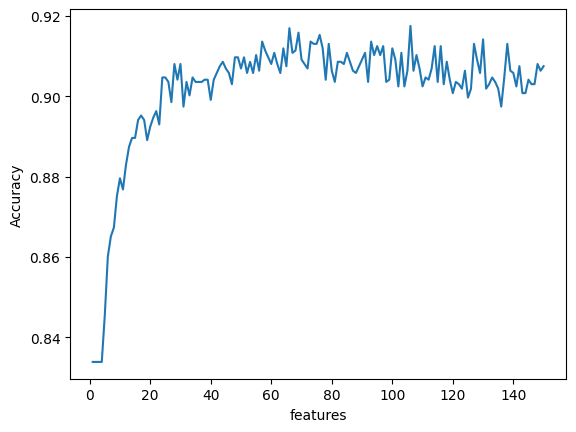

In [13]:
################################################################################
# Reduce number of features to the half
################################################################################
print("----- Feature selection using 50% of predictors -----")

# Select features
fselection = SelectKBest(f_classif, k = 6)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

# Fit model using the new data set
clf = SVC(kernel = 'linear')
x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

# Evaluate model using cross validation
cv_y_test = []
cv_y_pred = []

kf = StratifiedKFold(n_splits=5, shuffle = True)

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    clf_cv = SVC(kernel = 'linear')

    fselection_cv = SelectKBest(f_classif, k = 6)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)

    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = fselection_cv.transform(x[test_index, :])
    y_test = y[test_index]
    y_pred = clf_cv.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

################################################################################
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")

n_feats = [i for i in range (1,151)]

acc_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)

    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        clf_cv = SVC(kernel = 'linear')

        fselection_cv = SelectKBest(f_classif, k = n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)


        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)

    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")

plt.show()

#5. Repite el paso anterior, pero para un método de selección de características de tipo Wrapper. (no se ejecutó debido al alto tiempo de ejecución)

In [14]:

'''

################################################################################
# Reduce number of features to the half
################################################################################
print("----- Feature selection using 50% of predictors -----")

# Select features
clf = SVC(kernel = 'linear')
fselection = SequentialFeatureSelector(clf, n_features_to_select = 0.5)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

# Fit model using the new data set
x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

# Evaluate model using cross validation
cv_y_test = []
cv_y_pred = []

kf = StratifiedKFold(n_splits=5, shuffle = True)

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    clf_cv = SVC(kernel = 'linear')

    fselection_cv = SequentialFeatureSelector(clf_cv, n_features_to_select=0.5)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)

    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = fselection_cv.transform(x[test_index, :])
    y_test = y[test_index]
    y_pred = clf_cv.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

################################################################################
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

acc_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)

    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        clf_cv = SVC(kernel = 'linear')

        fselection_cv = SequentialFeatureSelector(clf_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)


        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)

    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = SVC(kernel = 'linear')
fselection = SequentialFeatureSelector(clf, n_features_to_select = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

'''

'\n\n################################################################################\n# Reduce number of features to the half\n################################################################################\nprint("----- Feature selection using 50% of predictors -----")\n\n# Select features\nclf = SVC(kernel = \'linear\')\nfselection = SequentialFeatureSelector(clf, n_features_to_select = 0.5)\nfselection.fit(x, y)\n\nprint("Selected features: ", fselection.get_feature_names_out())\n\n# Fit model using the new data set\nx_transformed = fselection.transform(x)\nclf.fit(x_transformed, y)\n\n# Evaluate model using cross validation\ncv_y_test = []\ncv_y_pred = []\n\nkf = StratifiedKFold(n_splits=5, shuffle = True)\n\nfor train_index, test_index in kf.split(x, y):\n\n    # Training phase\n    x_train = x[train_index, :]\n    y_train = y[train_index]\n\n    clf_cv = SVC(kernel = \'linear\')\n\n    fselection_cv = SequentialFeatureSelector(clf_cv, n_features_to_select=0.5)\n    fselection_c

#6. Repite el paso 4, pero para un método de selección de características de tipo Filter-Wrapper. (no se ejecutó debido al alto tiempo de ejecución)

In [15]:
'''

################################################################################
# Reduce number of features to the half
################################################################################
print("----- Feature selection using 50% of predictors -----")

# Select features
clf = SVC(kernel = 'linear')
fselection = RFE(clf, n_features_to_select = 0.5)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

# Fit model using the new data set
x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

# Evaluate model using cross validation
cv_y_test = []
cv_y_pred = []

kf = StratifiedKFold(n_splits=5, shuffle = True)

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    clf_cv = SVC(kernel = 'linear')

    fselection_cv = RFE(clf_cv, n_features_to_select=0.5)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)

    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = fselection_cv.transform(x[test_index, :])
    y_test = y[test_index]
    y_pred = clf_cv.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

################################################################################
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

acc_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)

    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        clf_cv = SVC(kernel = 'linear')

        fselection_cv = RFE(clf_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)


        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)

    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = SVC(kernel = 'linear')
fselection = RFE(clf, n_features_to_select = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

'''

'\n\n################################################################################\n# Reduce number of features to the half\n################################################################################\nprint("----- Feature selection using 50% of predictors -----")\n\n# Select features\nclf = SVC(kernel = \'linear\')\nfselection = RFE(clf, n_features_to_select = 0.5)\nfselection.fit(x, y)\n\nprint("Selected features: ", fselection.get_feature_names_out())\n\n# Fit model using the new data set\nx_transformed = fselection.transform(x)\nclf.fit(x_transformed, y)\n\n# Evaluate model using cross validation\ncv_y_test = []\ncv_y_pred = []\n\nkf = StratifiedKFold(n_splits=5, shuffle = True)\n\nfor train_index, test_index in kf.split(x, y):\n\n    # Training phase\n    x_train = x[train_index, :]\n    y_train = y[train_index]\n\n    clf_cv = SVC(kernel = \'linear\')\n\n    fselection_cv = RFE(clf_cv, n_features_to_select=0.5)\n    fselection_cv.fit(x_train, y_train)\n    x_train = fsele

#7. Escoge alguna de las técnicas de selección de características que probaste con anteioridad, y con el número óptimo de características encontrado, prepara tu modelo para producción haciendo lo siguiente:
Aplica el método de selección de características con todos los datos.
Ajusta el modelo con las características encontradas.

In [16]:
# Fit model with optimal number of features
clf = SVC(kernel = 'linear')
fselection = SelectKBest(f_classif, k = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

Selected features:  ['x1' 'x2' 'x3' 'x9' 'x10' 'x11' 'x12' 'x13' 'x15' 'x16' 'x17' 'x18' 'x19'
 'x20' 'x21' 'x22' 'x23' 'x24' 'x25' 'x26' 'x27' 'x28' 'x29' 'x30' 'x31'
 'x38' 'x39' 'x40' 'x41' 'x42' 'x43' 'x44' 'x48' 'x49' 'x50' 'x51' 'x54'
 'x55' 'x56' 'x58' 'x60' 'x61' 'x62' 'x63' 'x64' 'x65' 'x66' 'x67' 'x69'
 'x70' 'x71' 'x75' 'x76' 'x77' 'x78' 'x79' 'x80' 'x88' 'x89' 'x90' 'x91'
 'x93' 'x95' 'x96' 'x97' 'x98' 'x99' 'x100' 'x101' 'x102' 'x103' 'x104'
 'x105' 'x106' 'x107' 'x108' 'x111' 'x112' 'x113' 'x114' 'x115' 'x117'
 'x118' 'x119' 'x120' 'x122' 'x124' 'x125' 'x127' 'x128' 'x129' 'x130'
 'x131' 'x132' 'x133' 'x134' 'x139' 'x140' 'x141' 'x142' 'x147' 'x148'
 'x149' 'x150' 'x151' 'x152']


SVC(kernel='linear')

#8. Contesta las siguientes preguntas:

**¿Qué pasa si no se considera el problema de tener datos desbalanceados para este caso? ¿Por qué?**

Si no se considera el tener datos desbalanceados, el modelo de clasificación puede resultar no adecuado, ya que puede exisitir una clasificación sesgada (las predicciones pueden ser bastante inclinadas a los datos mayoritarios), altas tasas de falsos negativos / positivos y una mala evaluación.

**De todos los clasificadores, ¿cuál o cuales consideras que son adecuados para los datos? ¿Qué propiedades tienen dichos modelos que los hacen apropiados para los datos? Argumenta tu respuesta.**

El mejor clasificador es definitivamente RBM-SVM, debido a que comparado a los otros clasificadores, RBM-SVM brinda la mayor precisión en ambas variables.

**¿Es posibles reducir la dimensionalidad del problema sin perder rendimiento en el modelo? ¿Por qué?**

Si bien reducir la dimensionalidad del problema puede significar beneficios para el rendimiento y la eficiencia computacional, es importante tomar en cuenta que se puede perder información relevante para el proceso, por lo tanto, es probable que se pueda perder cierto rendimiento en nuestro modelo si se aplica.

**¿Qué método de selección de características consideras el más adecuado para este caso? ¿Por qué?**

En el caso específico de este problema, el mejor selector de caracterísiticas es el de Filter, debido a que no fue posible ejecutar los demás clasificadores en un periodo de tiempo descente.

**Si quisieras mejorar el rendimiento de tus modelos, ¿qué más se podría hacer?**

Como en cada problema, para mejorar nuestro modelo se pueden implementar y probar diferentes técnicas para identificar la(s) más efectiva(s), como ajustar hiperparámetros para mejorar el modelo o combinar varios modelos para mejorar su desempeño lo más posible.

#Problema 2
1. Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.

In [17]:
# Load data set. Trabajé con el dataset 'M_3.txt' debido a que el penúltimo número de mi matrícula A01634154 es 5
data = np.loadtxt("M_3.txt")
x = data[:,2:]
y = data[:,0]

In [18]:
# Calcular la cantidad de muestras de cada clase
cantidad_clase_1 = np.sum(y == 1)
cantidad_clase_2 = np.sum(y == 2)
cantidad_clase_3 = np.sum(y == 3)
cantidad_clase_4 = np.sum(y == 4)
cantidad_clase_5 = np.sum(y == 5)
cantidad_clase_6 = np.sum(y == 6)
cantidad_clase_7 = np.sum(y == 7)

# Imprimir la cantidad de muestras de cada clase
print(f'Cantidad de muestras de clase 1: {cantidad_clase_1}')
print(f'Cantidad de muestras de clase 2: {cantidad_clase_2}')
print(f'Cantidad de muestras de clase 3: {cantidad_clase_3}')
print(f'Cantidad de muestras de clase 4: {cantidad_clase_4}')
print(f'Cantidad de muestras de clase 5: {cantidad_clase_5}')
print(f'Cantidad de muestras de clase 6: {cantidad_clase_6}')
print(f'Cantidad de muestras de clase 7: {cantidad_clase_7}')

Cantidad de muestras de clase 1: 90
Cantidad de muestras de clase 2: 90
Cantidad de muestras de clase 3: 90
Cantidad de muestras de clase 4: 90
Cantidad de muestras de clase 5: 90
Cantidad de muestras de clase 6: 90
Cantidad de muestras de clase 7: 90


#2. Linear SVM. Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

In [19]:
features = x
n_features = len(x)

# Linear SVM
print('----- Linear-SVM -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = SVC(kernel = 'linear')
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Linear-SVM -----
              precision    recall  f1-score   support

         1.0       1.00      0.99      0.99        90
         2.0       0.99      1.00      0.99        90
         3.0       0.95      0.96      0.95        90
         4.0       1.00      1.00      1.00        90
         5.0       0.99      1.00      0.99        90
         6.0       0.98      0.93      0.95        90
         7.0       0.93      0.96      0.95        90

    accuracy                           0.98       630
   macro avg       0.98      0.98      0.98       630
weighted avg       0.98      0.98      0.98       630



#2. RBM SVM. Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

In [20]:
features = x
n_features = len(x)

# Linear SVM
print('----- Linear-SVM -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = SVC(kernel = 'linear')
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Linear-SVM -----
              precision    recall  f1-score   support

         1.0       1.00      0.99      0.99        90
         2.0       0.99      0.97      0.98        90
         3.0       0.96      0.94      0.95        90
         4.0       1.00      1.00      1.00        90
         5.0       0.99      1.00      0.99        90
         6.0       0.94      0.93      0.94        90
         7.0       0.94      0.98      0.96        90

    accuracy                           0.97       630
   macro avg       0.97      0.97      0.97       630
weighted avg       0.97      0.97      0.97       630



#2. KNN. Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

In [21]:
# KNN
print('----- KNN -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- KNN -----
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99        90
         2.0       0.97      0.96      0.96        90
         3.0       0.98      0.90      0.94        90
         4.0       1.00      0.99      0.99        90
         5.0       0.99      1.00      0.99        90
         6.0       0.89      0.94      0.92        90
         7.0       0.96      0.99      0.97        90

    accuracy                           0.97       630
   macro avg       0.97      0.97      0.97       630
weighted avg       0.97      0.97      0.97       630



#2. Decision Tree. Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

In [22]:
# Decision tree
print('----- Decision tree -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Decision tree -----
              precision    recall  f1-score   support

         1.0       0.85      0.78      0.81        90
         2.0       0.67      0.77      0.72        90
         3.0       0.78      0.84      0.81        90
         4.0       0.90      0.88      0.89        90
         5.0       0.87      0.89      0.88        90
         6.0       0.72      0.63      0.67        90
         7.0       0.93      0.91      0.92        90

    accuracy                           0.81       630
   macro avg       0.82      0.81      0.81       630
weighted avg       0.82      0.81      0.81       630



#2. Linear Discriminant Analysis. Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

In [23]:
# Linear Discriminant Analysis
print('----- Linear Discriminant Analysis -----')

kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = LinearDiscriminantAnalysis()
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Linear Discriminant Analysis -----
              precision    recall  f1-score   support

         1.0       0.92      0.97      0.94        90
         2.0       0.80      0.89      0.84        90
         3.0       0.90      0.88      0.89        90
         4.0       1.00      0.96      0.98        90
         5.0       0.98      0.92      0.95        90
         6.0       0.80      0.80      0.80        90
         7.0       0.93      0.89      0.91        90

    accuracy                           0.90       630
   macro avg       0.90      0.90      0.90       630
weighted avg       0.90      0.90      0.90       630



#3. Hiperparámetros con SVM. Escoge al menos dos clasificadores que hayas evaluado en el paso anterior e identifica sus hiperparámetros. Lleva a cabo el proceso de validación cruzada anidada para evaluar los dos modelos con la selección óptima de hiperparámetros.

----- SVM classifier - Regularization parameter -----
---- C = 0.001
ACC: 0.9666666666666666
---- C = 0.0010974987654930556
ACC: 0.9761904761904763
---- C = 0.0012045035402587824
ACC: 0.9777777777777779
---- C = 0.0013219411484660286
ACC: 0.9777777777777779
---- C = 0.0014508287784959402
ACC: 0.976190476190476
---- C = 0.0015922827933410922
ACC: 0.976190476190476
---- C = 0.001747528400007683
ACC: 0.976190476190476
---- C = 0.0019179102616724887
ACC: 0.9761904761904763
---- C = 0.00210490414451202
ACC: 0.9761904761904763
---- C = 0.0023101297000831605
ACC: 0.9793650793650794
---- C = 0.0025353644939701114
ACC: 0.9793650793650792
---- C = 0.0027825594022071257
ACC: 0.9746031746031745
---- C = 0.0030538555088334154
ACC: 0.9777777777777779
---- C = 0.003351602650938841
ACC: 0.9761904761904763
---- C = 0.0036783797718286343
ACC: 0.9746031746031745
---- C = 0.004037017258596553
ACC: 0.9777777777777779
---- C = 0.004430621457583882
ACC: 0.9746031746031745
---- C = 0.004862601580065354
ACC: 0

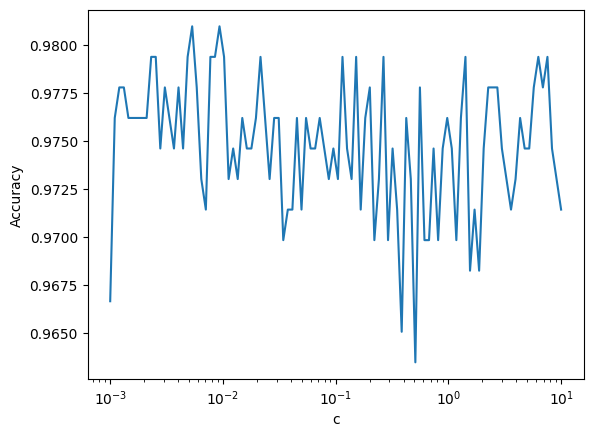

SVC(C=0.0093260334688322, kernel='linear')

In [24]:
###############################################################################
# Regularization parameter of the linear SVM classifier
################################################################################
print("----- SVM classifier - Regularization parameter -----")

cc = np.logspace(-3, 1, 100)

acc = []

for c in cc:
    print('---- C =', c)

    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        clf_cv = SVC(C=c, kernel = 'linear')

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)

        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc_hyp = np.average(acc_cv)
    acc.append(acc_hyp)

    print('ACC:', acc_hyp)

opt_index = np.argmax(acc)
opt_hyperparameter = cc[opt_index]
print("Optimal C: ", opt_hyperparameter)

plt.plot(cc, acc)
plt.xscale('log')
plt.xlabel("c")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = SVC(C=opt_hyperparameter, kernel = 'linear')
clf.fit(x, y)

#3. Hiperparámetros con RB-SVM. Escoge al menos dos clasificadores que hayas evaluado en el paso anterior e identifica sus hiperparámetros. Lleva a cabo el proceso de validación cruzada anidada para evaluar los dos modelos con la selección óptima de hiperparámetros.

----- RB-SVM classifier - Smoothing parameter -----
---- gamma = 1e-05
ACC: 0.7428571428571429
---- gamma = 1.0974987654930568e-05
ACC: 0.7507936507936507
---- gamma = 1.2045035402587812e-05
ACC: 0.7873015873015874
---- gamma = 1.3219411484660286e-05
ACC: 0.819047619047619
---- gamma = 1.4508287784959402e-05
ACC: 0.8476190476190476
---- gamma = 1.5922827933410938e-05
ACC: 0.8507936507936508
---- gamma = 1.747528400007683e-05
ACC: 0.8682539682539684
---- gamma = 1.917910261672489e-05
ACC: 0.8714285714285713
---- gamma = 2.104904144512022e-05
ACC: 0.8793650793650795
---- gamma = 2.310129700083158e-05
ACC: 0.880952380952381
---- gamma = 2.5353644939701114e-05
ACC: 0.8841269841269842
---- gamma = 2.782559402207126e-05
ACC: 0.8936507936507937
---- gamma = 3.053855508833412e-05
ACC: 0.8873015873015874
---- gamma = 3.351602650938841e-05
ACC: 0.8920634920634921
---- gamma = 3.678379771828634e-05
ACC: 0.9015873015873016
---- gamma = 4.037017258596558e-05
ACC: 0.9111111111111111
---- gamma = 4.4

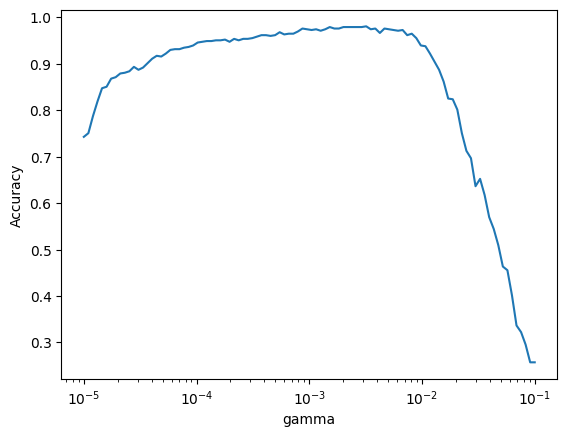

SVC(C=0.0031992671377973846, kernel='linear')

In [25]:
################################################################################
# Smoothing parameter of the RB-SVM classifier
################################################################################
print("----- RB-SVM classifier - Smoothing parameter -----")

gg = np.logspace(-5, -1, 100)

acc = []

for g in gg:
    print('---- gamma =', g)

    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        clf_cv = SVC(kernel ='rbf', gamma = g)

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)

        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc_hyp = np.average(acc_cv)
    acc.append(acc_hyp)

    print('ACC:', acc_hyp)

opt_index = np.argmax(acc)
opt_hyperparameter = gg[opt_index]
print("Optimal gamma: ", opt_hyperparameter)

plt.plot(gg, acc)
plt.xscale('log')
plt.xlabel("gamma")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = SVC(C=opt_hyperparameter, kernel = 'linear')
clf.fit(x, y)


#4. Prepara tus modelos para producción haciendo lo siguiente:
Opten los hiperparámetros óptimos utilizando todo el conjunto de datos con validación cruzada.
Con los hiperparámetros óptimos, ajusta el modelo con todos los datos.

In [26]:
# Create an SVM model with linear kernel
svm_model = SVC(kernel='linear')

# Evaluation with k-Fold Cross-Validation
print("----- Model evaluation with k-Fold Cross-Validation -----")
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x[train_index, :]
    y_train = y[train_index]
    x_test = x[test_index, :]
    y_test = y[test_index]

    # Perform hyperparameter grid search for SVM
    parameters = {'C': [0.1, 1, 10]}
    clf_cv = GridSearchCV(svm_model, parameters, cv=5)
    clf_cv.fit(x_train, y_train)

    # Predict on the test set
    y_pred = clf_cv.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

# Calculate and print the classification report
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

# Evaluation with cross_val_predict
print("----- Model evaluation with cross_val_predict -----")
clf = GridSearchCV(svm_model, {'C': [0.1, 1, 10]}, cv=5)
y_pred = cross_val_predict(clf, x, y, cv=5)
print(classification_report(y, y_pred))

# Production model
print("----- Production model -----")
clf = GridSearchCV(svm_model, {'C': [0.1, 1, 10]}, cv=5)
clf.fit(x, y)
print(clf.best_estimator_)

----- Model evaluation with k-Fold Cross-Validation -----
              precision    recall  f1-score   support

         1.0       1.00      0.99      0.99        90
         2.0       0.99      0.99      0.99        90
         3.0       0.99      0.93      0.96        90
         4.0       1.00      1.00      1.00        90
         5.0       0.99      1.00      0.99        90
         6.0       0.94      0.94      0.94        90
         7.0       0.94      0.99      0.96        90

    accuracy                           0.98       630
   macro avg       0.98      0.98      0.98       630
weighted avg       0.98      0.98      0.98       630

----- Model evaluation with cross_val_predict -----
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97        90
         2.0       0.97      0.99      0.98        90
         3.0       0.94      0.91      0.93        90
         4.0       1.00      1.00      1.00        90
         5.0       0.9

#5. Contesta lo siguiente

**¿Observas un problema en cuanto al balanceo de las clases? ¿Por qué?**

No se observa un problema en cuanto al balanceo de los datos, debido a que las muestras para cada una de las 7 clases son exactamente 90, está perfectamente balanceado.

**¿Qué modelo o modelos fueron efectivos para clasificar tus datos? ¿Observas algo especial sobre los modelos? Argumenta tu respuesta.**

Los modelos mas efectivos fueron Linear SVM y RBM-SVM, ambos modelos otorgaron la mejor precisión en la 7 variables, sin embargo, si se tuviera que elegir el mejor sería SVM ya que es el de mayor exactitud de todos por diferencia de 0.1 en 2 variables comparado a RBM-SVM.

**¿Observas alguna mejora importante al optimizar hiperparámetros? ¿Es el resultado que esperabas? Argumenta tu respuesta.**

Si, se obsereva que la precisión aumenta y se acerca más a 1, lo cual nos indica que hubo una mejora y eran los resultados que se esperaban.

**¿Qué inconvenientes hay al encontrar hiperparámetros? ¿Por qué?**

Uno de los inconvenientes que pueden ocurrir son en validación cruzada, al realizar la prueba los resultados pueden estar sesgados y si no se manajan adecuadamente los hiperparámetros seleccionados pueden ser no óptimos.
Adicionalmente, los problemas no lineales con hiperparámetros puede brindar resultados menos precisos y más difíciles de interpretar.